# Exercise 1

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
def read_weighted_edges(file):
    data = iter(open(file, "r", encoding="utf-8")) 
    n = int(next(data))

    matrix = [[float(x) for x in row.strip().split(" ")] for row in data] 
    matrix = np.array(matrix)

    # Check number of nodes and edges
    assert matrix.shape == (n, n) 
    print(f"Matrix loaded with {n} nodes")

    edges = []
    for i in range(n):
        for j in range(n):
            if matrix[i][j] != 0 and i != j and (j, i, matrix[j][i]) not in edges:
                edges.append((i, j, matrix[i][j])) 
                
    print(f"Loaded {len(edges)} edges")

    edges = sorted(edges, key=lambda x: x[2], reverse=True)

    return n, edges

def adjacency_matrix(n, edges):
    adj_matrix = np.zeros((n, n))

    for edge in edges: 
        i, j, _ = edge
        adj_matrix[i, j] = 1 
        adj_matrix[j, i] = 1

    return adj_matrix

def degree_matrix(adj_matrix):
    return np.diag(np.sum(adj_matrix, axis=1))

def normalized_laplacian_matrix(adj_matrix): 
    D = degree_matrix(adj_matrix)

    with np.errstate(divide='ignore'):
        D_inv_sqrt = np.diag(1 / np.sqrt(np.diag(D)))

    D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0 # Replace inf values with 0

    return D_inv_sqrt @ (D - adj_matrix) @ D_inv_sqrt

def second_smallest_eigenvalue(L): 
    eigenvalues = np.linalg.eigvals(L) 
    eigenvalues.sort()

    return eigenvalues[1]

n, weighted_edges = read_weighted_edges("/Users/yuchenhongshu/UMD_Courses/MATH420/HW/amsc420-project-2/sgb128Nodes41to80_weight.txt") 
m = len(weighted_edges)

lambda1_values = []

for k in range(1, m + 1):
    adj_matrix = adjacency_matrix(n, weighted_edges[:k]) 
    L = normalized_laplacian_matrix(adj_matrix)
    lambda1 = second_smallest_eigenvalue(L) 
    lambda1_values.append(lambda1)
    
print("Lambda 1 finished computing")

Matrix loaded with 40 nodes
Loaded 780 edges
Lambda 1 finished computing


## Exercise 1.1

/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


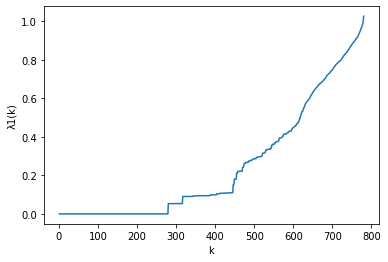

In [17]:
k_values = np.arange(1, m + 1) 
plt.plot(k_values, lambda1_values) 
plt.xlabel("k") 
plt.ylabel("λ1(k)")
plt.show()

## Exercise 1.2

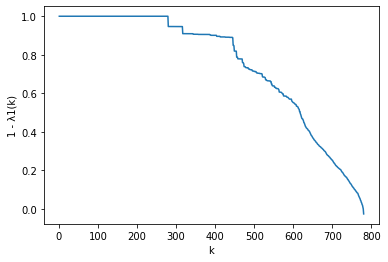

In [18]:
one_minus_lambda1 = 1 - np.array(lambda1_values) 
plt.plot(k_values, one_minus_lambda1) 
plt.xlabel("k")
plt.ylabel("1 - λ1(k)")
plt.show()

## Exercise 1.3

In [19]:
from scipy.optimize import curve_fit 

def log_log_model(x, c0, alpha):
    return c0 - alpha * np.log(x) 

k_values_fit = k_values[5:m - 5]
assert len(k_values_fit) == len(k_values) - 10
log_one_minus_lambda1_fit = np.log(one_minus_lambda1[5:m - 5])
params, _ = curve_fit(log_log_model, k_values_fit, log_one_minus_lambda1_fit) 
c0, alpha = params
print(f"Estimated c0: {c0}, Estimated alpha: {alpha}")

Estimated c0: 1.8686883003566588, Estimated alpha: 0.4022978328420497


/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:601: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


# Exercise 2

## Exercise 2.1

In [20]:
weight_matrix = np.array(\
# 1  2  3  4  5  6
[[0, 4, 1, 0, 0, 3], # 1
 [4, 0, 2, 0, 0, 1], # 2
 [1, 2, 0, 2, 1, 0], # 3
 [0, 0, 2, 0, 4, 1], # 4
 [0, 0, 1, 4, 0, 2], # 5
 [3, 1, 0, 1, 2, 0]  # 6
])
print("W")
print(weight_matrix)
# Check if matrix is symmetric, to validate  
# that weights are entered correctly
print(f"Matrix symmetric? {np.allclose(weight_matrix, weight_matrix.T)}")

W
[[0 4 1 0 0 3]
 [4 0 2 0 0 1]
 [1 2 0 2 1 0]
 [0 0 2 0 4 1]
 [0 0 1 4 0 2]
 [3 1 0 1 2 0]]
Matrix symmetric? True
